   0 HDA Intel PCH: CX20724 Analog (hw:0,0), ALSA (2 in, 2 out)
   1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   4 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
   5 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
   6 sysdefault, ALSA (128 in, 128 out)
   7 front, ALSA (0 in, 2 out)
   8 surround40, ALSA (0 in, 2 out)
   9 surround51, ALSA (0 in, 2 out)
  10 surround71, ALSA (0 in, 2 out)
  11 hdmi, ALSA (0 in, 8 out)
  12 pulse, ALSA (32 in, 32 out)
  13 dmix, ALSA (0 in, 2 out)
* 14 default, ALSA (32 in, 32 out)
(1, 240000)


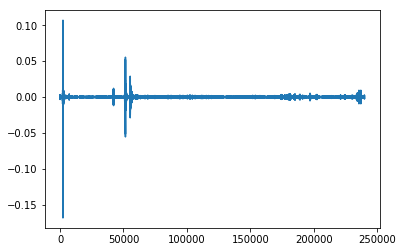

In [10]:
import measuretf as mtf
import sounddevice as sd
import matplotlib.pyplot as plt

# Print the available audio devices together with their id
print(sd.query_devices())

# specify the device you want to use (None for default)
device = None

# generate sweep
T_sweep = 5
samplerate = int(48e3)
sweep = mtf.exponential_sweep(T_sweep, samplerate)

# measure the impulse response
gain = 0.3
impulse_response = mtf.measure_single_output_impulse_response(
    gain * sweep, samplerate, out_ch=1, in_ch=1
)

print(impulse_response.shape)

# transpose to make one graph with 96000 samples and not 96000 plots of one sample
plt.plot(impulse_response.T)

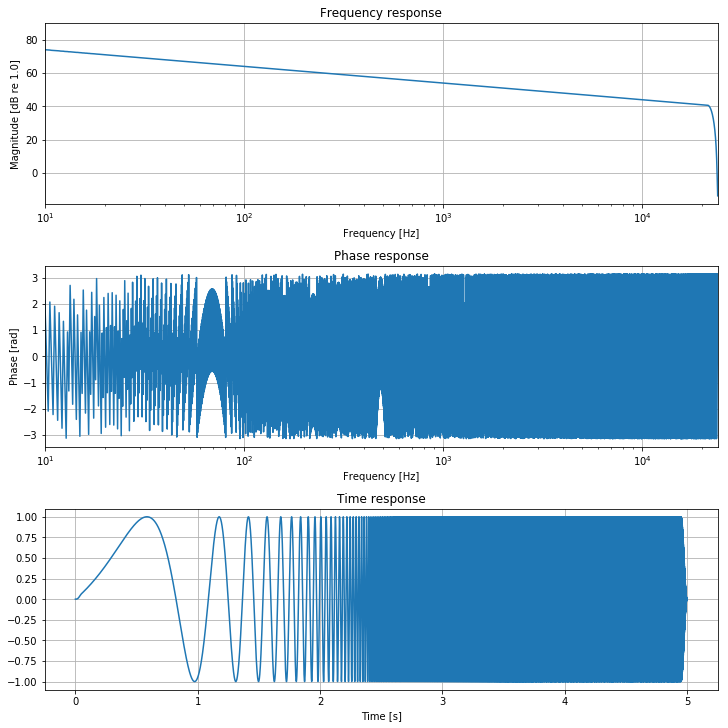

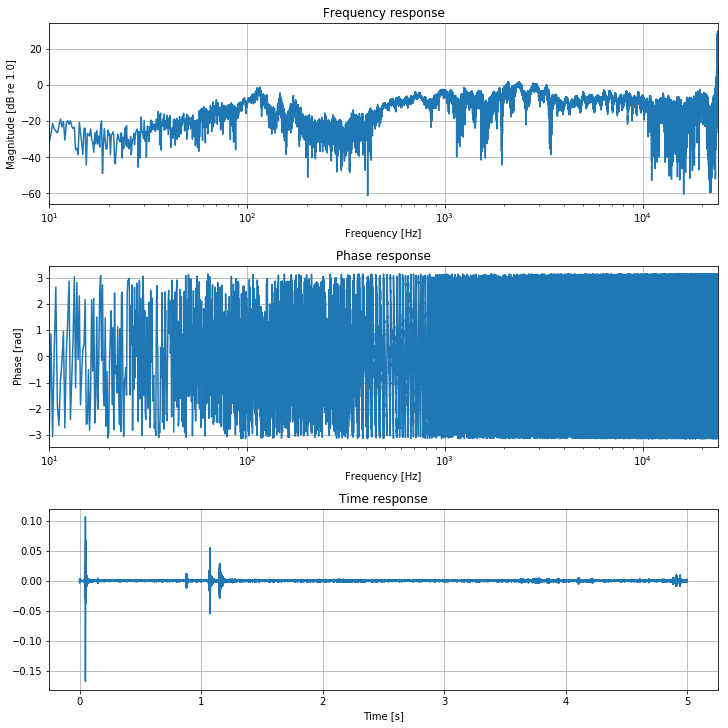

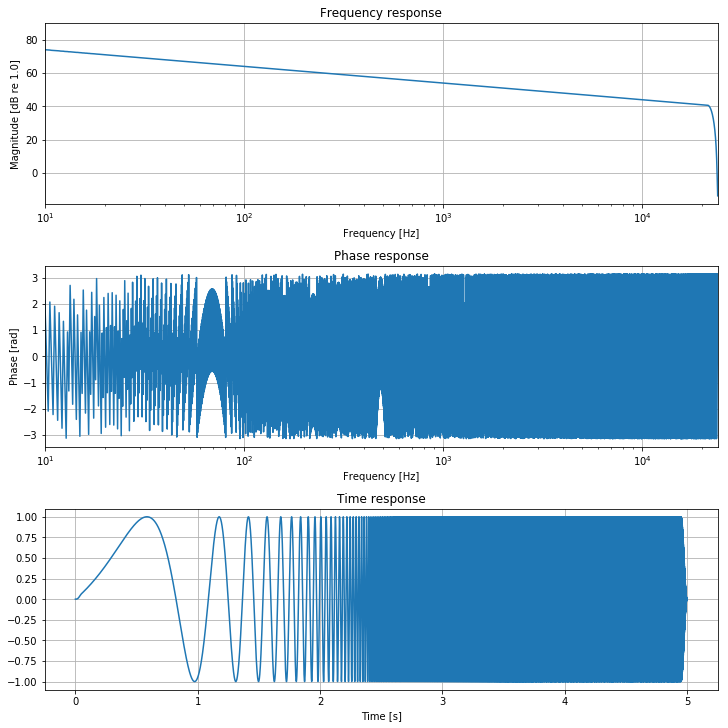

In [11]:
from response import Response

Response.from_time(samplerate, impulse_response).plot()

Response.from_time(samplerate, sweep).plot()